# Clustering Analysis - Kmeans

### Overview

  - [K-means clustering using scikit-learn](#K-means-clustering-using-scikit-learn)
  - [A smarter way of placing the initial cluster centroids using k-means++](#A-smarter-way-of-placing-the-initial-cluster-centroids-using-k-means++)
  - [Hard versus soft clustering](#Hard-versus-soft-clustering)
  - [Using the elbow method to find the optimal number of clusters](#Using-the-elbow-method-to-find-the-optimal-number-of-clusters)
  - [Quantifying the quality of clustering via silhouette plots](#Quantifying-the-quality-of-clustering-via-silhouette-plots)


## K-means clustering using scikit-learn

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.savefig('unlabeled.png', dpi=300)
plt.show()

C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)
C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


<Figure size 640x480 with 1 Axes>

In [3]:
from sklearn.cluster import KMeans
n_clusters = 3

km = KMeans(n_clusters=n_clusters, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-04,
            random_state=1)

y_km = km.fit_predict(X)

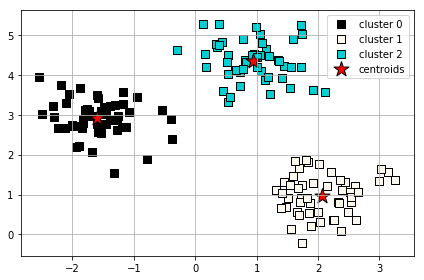

In [4]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
lc = [name for name, color in colors.items()]
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
step = int(len(lc)/n_clusters)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('3classes.png', dpi=300)
plt.show()

## Bad initialization of clusters

In [5]:
X, y = make_blobs(n_samples=300, 
                  n_features=2, 
                  centers=6, 
                  cluster_std=0.9, 
                  shuffle=True, 
                  random_state=0)

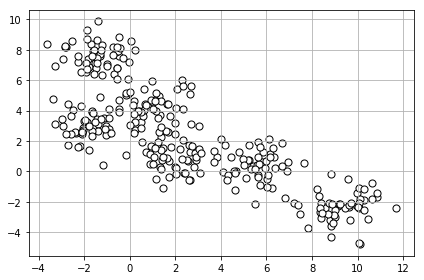

In [6]:
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.savefig('unlabeled.png', dpi=300)
plt.show()

In [7]:
from sklearn.cluster import KMeans
n_clusters = 6
step = int(len(lc)/n_clusters)

km = KMeans(n_clusters=n_clusters, 
            init='random', 
            n_init=1, 
            max_iter=3000,
            tol=1e-04,
            random_state=1)

y_km = km.fit_predict(X)

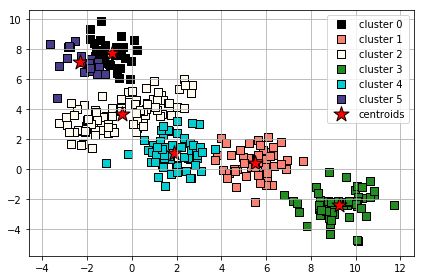

Intraclass distance:  649.1360484136505


26

In [8]:
from matplotlib import colors as mcolors

step = int(len(lc)/n_clusters)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('6classes1.png', dpi=300)
plt.show()

print("Intraclass distance: ",km.inertia_)
step

## Solve with several runs

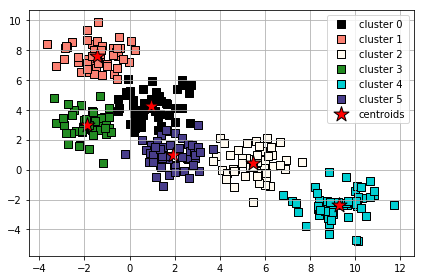

Intraclass distance:  457.44143263823423


In [9]:
from sklearn.cluster import KMeans
n_clusters = 6

km = KMeans(n_clusters=n_clusters,  init='random', n_init=10,  max_iter=3000,  tol=1e-04, random_state=1)

y_km = km.fit_predict(X)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('6classes10.png', dpi=300)
plt.show()

print("Intraclass distance: ",km.inertia_)

## A smarter way of placing the initial cluster centroids using k-means++

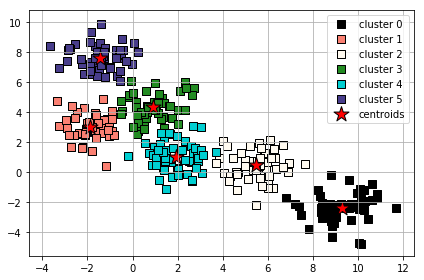

Intraclass distance:  457.7383792748466


In [10]:
n_clusters = 6

km = KMeans(n_clusters=n_clusters, init='k-means++',  n_init=1, max_iter=3000, tol=1e-04, random_state=1)
y_km = km.fit_predict(X)

from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
lc = [name for name, color in colors.items()]
step = int(len(lc)/n_clusters)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('6classes++.png', dpi=300)
plt.show()

print("Intraclass distance: ",km.inertia_)

## Hard versus soft clustering

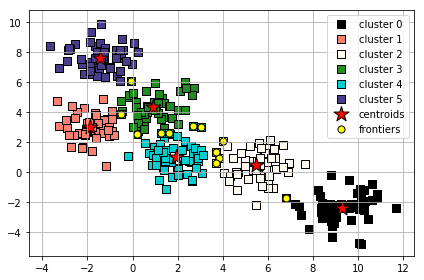

Intraclass distance:  457.7383792748466


In [11]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

soft= [x/sum(x) for x in euclidean_distances(X, km.cluster_centers_)]
first = np.asarray([np.sort(x)[0] for x in euclidean_distances(X, km.cluster_centers_)])
second = np.asarray([np.sort(x)[1] for x in euclidean_distances(X, km.cluster_centers_)])
dif=second-first
frontiers = np.where(dif<0.3)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')

plt.scatter(X[frontiers, 0],X[frontiers, 1],  s=50, marker='o',  c='yellow', edgecolor='black',
            label='frontiers')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('Frontiers.png', dpi=300)
plt.show()

print("Intraclass distance: ",km.inertia_)

## Outliers and Clustering

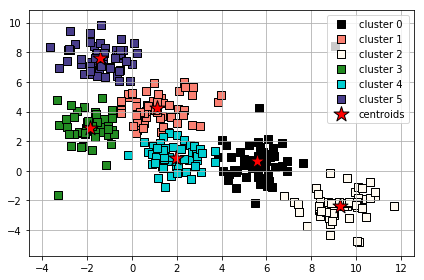

Intraclass distance:  595.923866535637


In [12]:
from random import uniform

rangeX=(min(X[:,0]),max(X[:,0]))
rangeY=(min(X[:,1]),max(X[:,1]))
outlayers = [[uniform(rangeX[0],rangeX[1]),uniform(rangeY[0],rangeY[1])] for i in range(10)]
np.asarray(outlayers)
X = np.vstack((X,outlayers))

km = KMeans(n_clusters=n_clusters, init='k-means++',  n_init=10, max_iter=3000, tol=1e-04, random_state=1)

y_km = km.fit_predict(X)

from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
lc = [name for name, color in colors.items()]
step = int(len(lc)/n_clusters)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('Outliers.png', dpi=300)
plt.show()

print("Intraclass distance: ",km.inertia_)



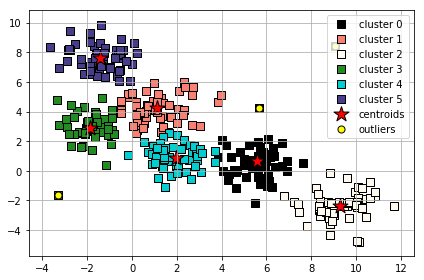

In [13]:
closer_distance = [min(x) for x in euclidean_distances(X, km.cluster_centers_)]

outliers=np.where(closer_distance > 4*np.std(closer_distance))

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')

plt.scatter(X[outliers, 0],X[outliers, 1],  s=50, marker='o',  c='yellow', edgecolor='black',
            label='outliers')


plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('OutliersRemoved.png', dpi=300)
plt.show()

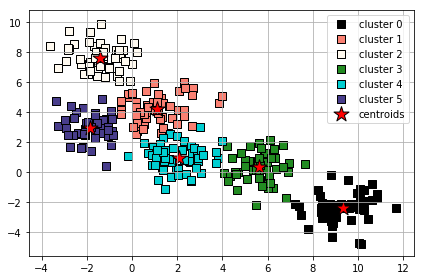

Intraclass distance:  484.9870045624292


In [14]:
X=np.delete(X,outliers,axis=0)

km = KMeans(n_clusters=n_clusters,  init='k-means++', n_init=1, max_iter=3000, tol=1e-04, random_state=1)

y_km = km.fit_predict(X)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('6classes++.png', dpi=300)
plt.show()

print("Intraclass distance: ",km.inertia_)


# Problems
    

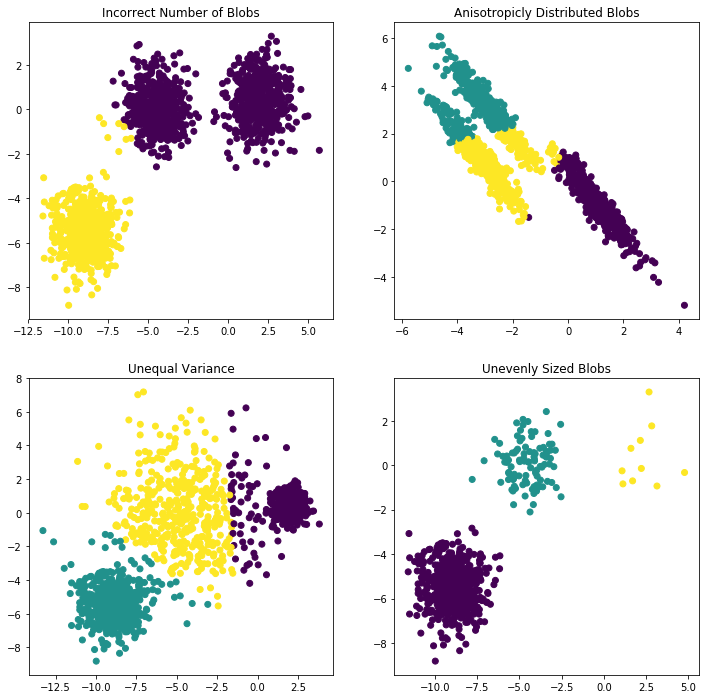

In [15]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## Using the elbow method to find the optimal number of clusters 

In [16]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 484.99


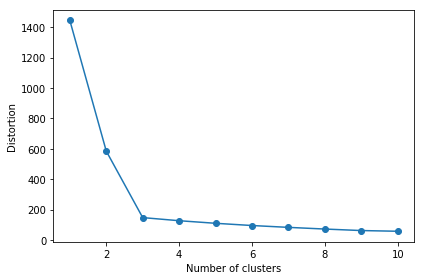

In [17]:
X, y = make_blobs(n_samples=300, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('Elbow.png', dpi=300)
plt.show()

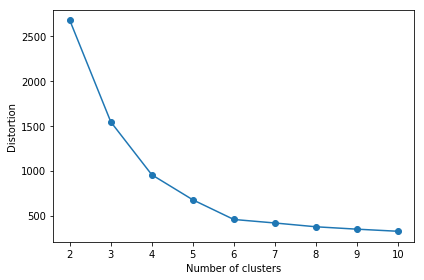

In [18]:
X, y = make_blobs(n_samples=300, 
                  n_features=2, 
                  centers=6, 
                  cluster_std=0.9, 
                  shuffle=True, 
                  random_state=0)

distortions = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('Elbow.png', dpi=300)
plt.show()

## Quantifying the quality of clustering  via silhouette plots

For each point of all classes, a measure of the average distance to the most closer class minus the average distance to elements of the same class (and normalized).

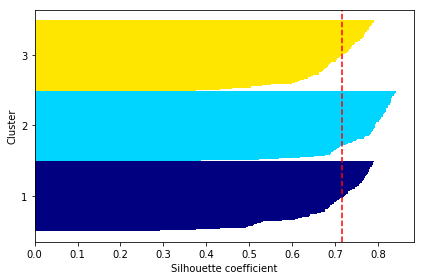

For n_clusters = 3 The average silhouette_score is : 0.716534980258917


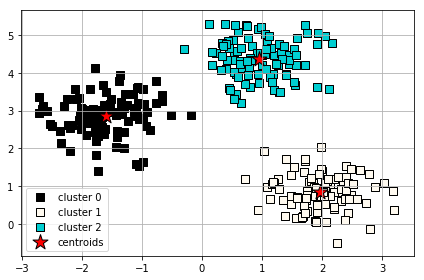

In [19]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

X, y = make_blobs(n_samples=300, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.savefig('Silhouette3.png', dpi=300)
plt.show()

print("For n_clusters =", 3,"The average silhouette_score is :", silhouette_avg)

step = int(len(lc)/n_clusters)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('6classes++.png', dpi=300)
plt.show()

Comparison to "bad" clustering:

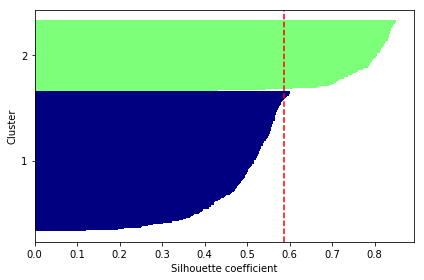

For n_clusters = 2 The average silhouette_score is : 0.5876242874760454


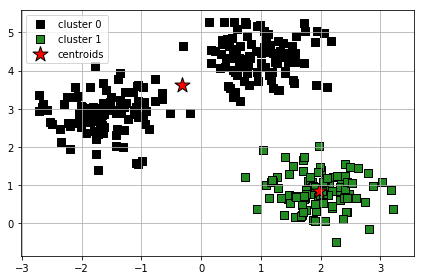

In [20]:
km = KMeans(n_clusters=2,  init='k-means++',  n_init=10,  max_iter=300,  tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.savefig('Silhouette2.png', dpi=300)
plt.show()


print("For n_clusters =", 2,"The average silhouette_score is :", silhouette_avg)

step = int(len(lc)/n_clusters)

for i in range(n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=sorted_names[i*step], marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('6classes++.png', dpi=300)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5504247364325481


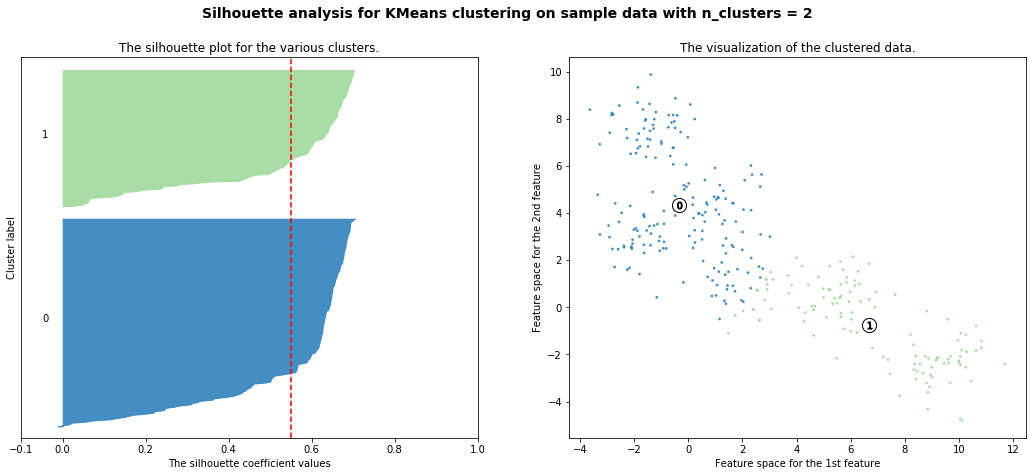

For n_clusters = 3 The average silhouette_score is : 0.5023028161036464


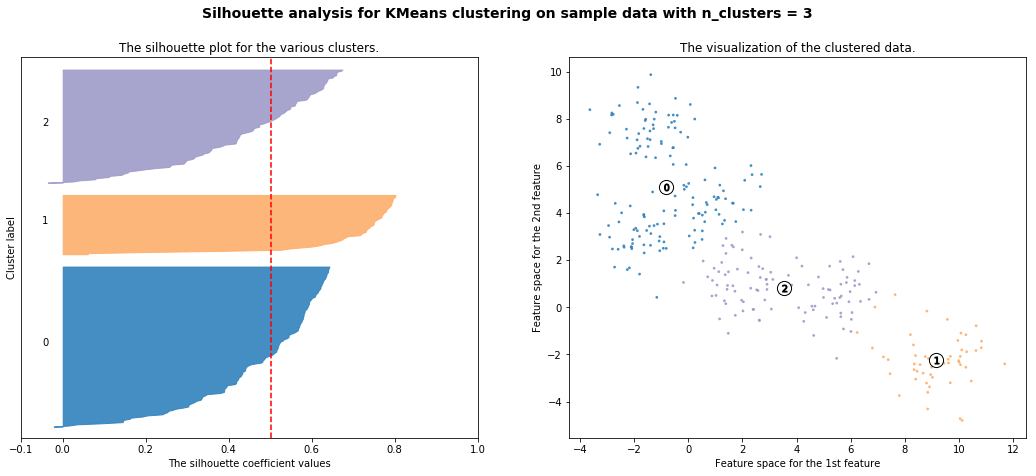

For n_clusters = 4 The average silhouette_score is : 0.495237200726177


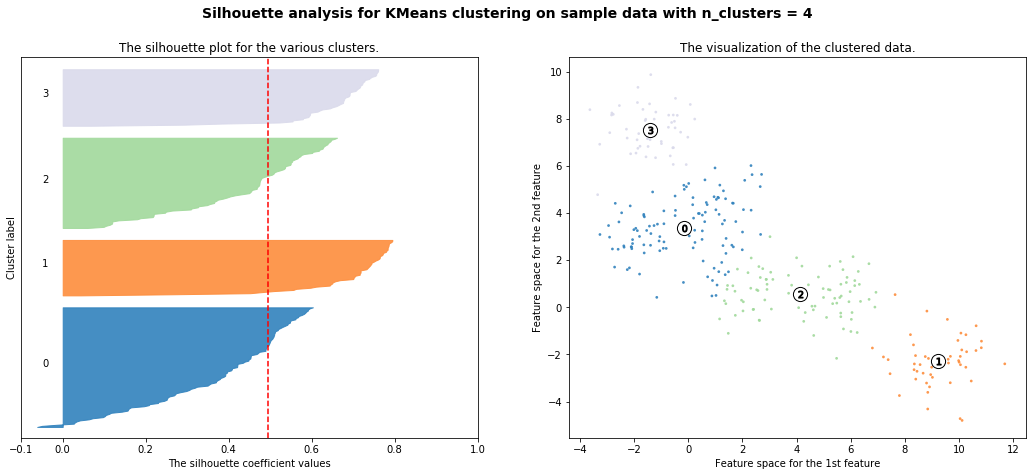

For n_clusters = 5 The average silhouette_score is : 0.5037460680463929


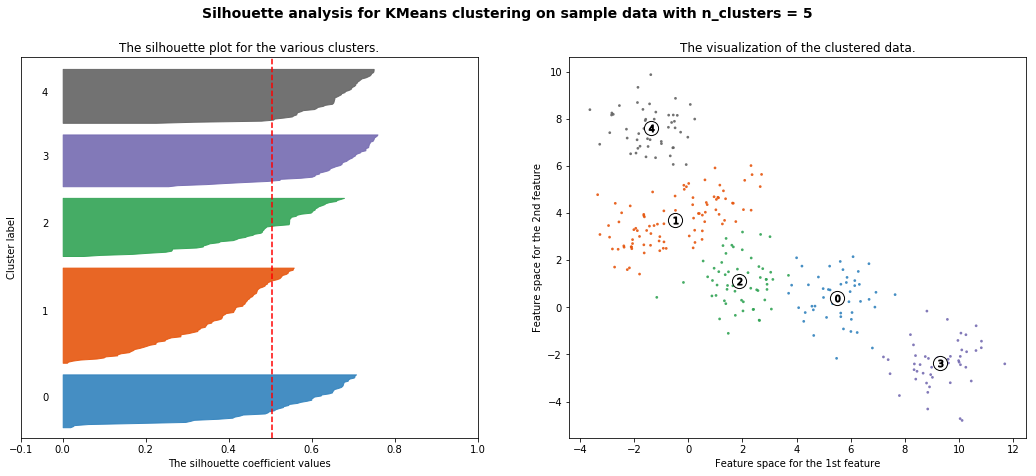

For n_clusters = 6 The average silhouette_score is : 0.5418271371288477


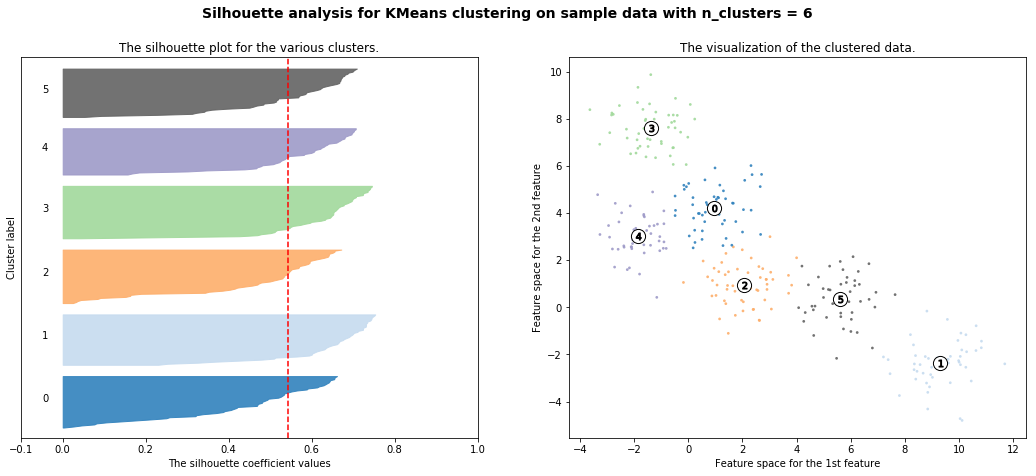

For n_clusters = 7 The average silhouette_score is : 0.5034451877589419


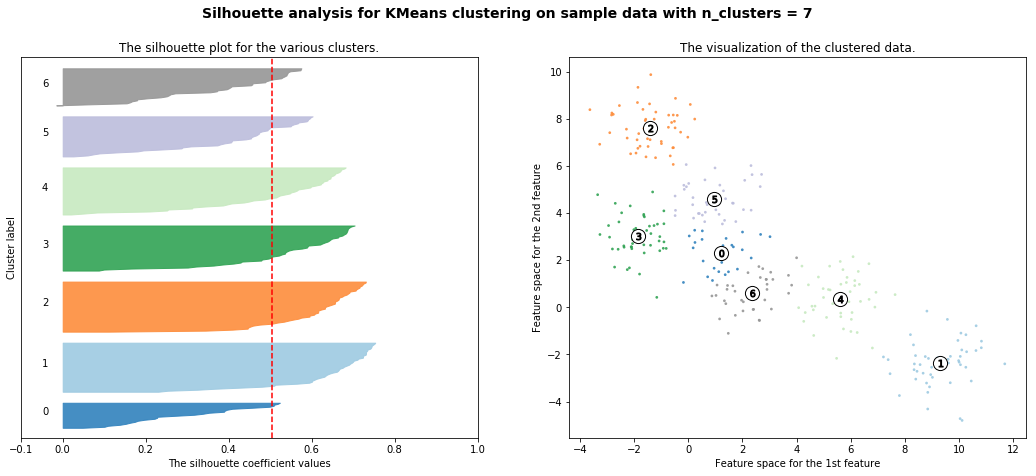

For n_clusters = 8 The average silhouette_score is : 0.4563666388491459


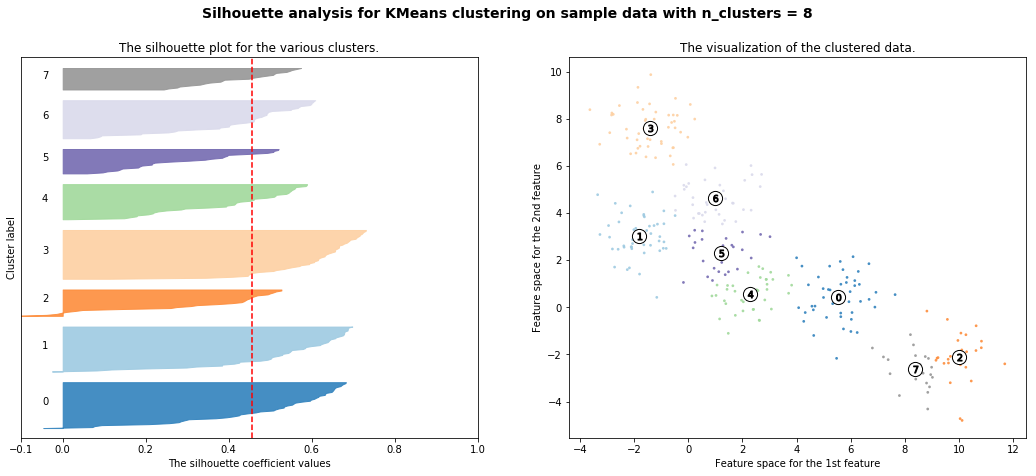

In [21]:
X, y = make_blobs(n_samples=300,  n_features=2, centers=6,
                  cluster_std=0.9, shuffle=True, random_state=0)


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("tab20c")
        color = cmap(float(i) / n_clusters)
        # color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.9)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("tab20c")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.9,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Real data

In [22]:
import pandas as pd

fn = 'company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [23]:
companies = list(stocks_df.index)
movements = stocks_df.values

In [24]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

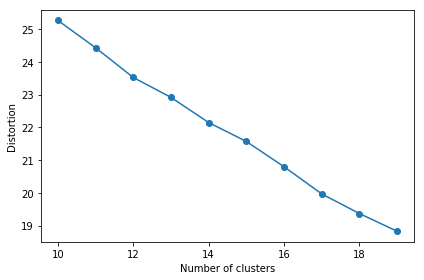

In [25]:
X=Normalizer().fit_transform(movements)

distortions = []
for i in range(10, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=100, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(10, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('Elbow.png', dpi=300)
plt.show()

In [26]:
nc=14
km = KMeans(n_clusters=nc,init='k-means++', n_init=100, max_iter=3000, random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
       n_clusters=14, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [27]:
labels = km.predict(movements)

df = pd.DataFrame({'labels': labels, 'companies': companies})
df.sort_values('labels')

,companies,labels
35,Navistar,0
53,Valero Energy,0
57,Exxon,0
44,Schlumberger,0
12,Chevron,0
10,ConocoPhillips,0
56,Wal-Mart,1
31,McDonalds,1
28,Coca Cola,1
38,Pepsi,1


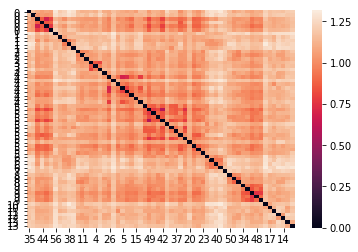

In [28]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

distances=squareform(pdist(X))
y_km = labels
inds=np.argsort(y_km)
dist = pd.DataFrame(distances[inds])
sns.heatmap(dist[inds],yticklabels=y_km[inds])
plt.show()

In [29]:

from io import BytesIO
from PIL import Image
import pandas as pd
import base64
import umap

def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10, plasma


X_embedded = umap.UMAP(n_neighbors=2,min_dist=0.5).fit_transform(X)

output_notebook()

digits_df = pd.DataFrame(X_embedded, columns=('x', 'y'))
digits_df['name'] = [str(x) for x in df.companies]
digits_df['labels'] = [str(x) for x in df['labels']]

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(x) for x in range(0,nc)], palette = plasma(14))

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <span style='font-size: 16px; color: #224499'> Company:</span>
        <span style='font-size: 18px'>@name</span>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'> K-means tag:</span>
        <span style='font-size: 18px'>@labels</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color={'field' : 'labels', 'transform' : color_mapping},
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)



C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 10 separate connected components using meta-embedding (experimental)
  n_components


Loading BokehJS ...